<a href="https://colab.research.google.com/github/Ayush8795/Bacteria/blob/main/BacteriaPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/GoogleDrive')

Mounted at /content/GoogleDrive


In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [5]:
import tensorflow_hub as hub
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
import os

In [50]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 16
data_path= '/content/GoogleDrive/MyDrive/dataset/dataset'

In [51]:
classes= os.listdir(data_path)

In [52]:
classes

['P.aeruginosa', 'S.aureus', 'E.coli', 'C.albicans', 'B.subtilis']

In [53]:
import cv2

In [66]:
data=[]
labels=[]

In [67]:
for cls in classes:
  pth= os.path.join(data_path,cls)
  images= os.listdir(pth)
  print('Loading images of {}'.format(cls))
  for img in images:
    img_path= os.path.join(pth,img)
    # print(img_path)
    image= cv2.imread(img_path)
    image= cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image= cv2.resize(image,IMG_SIZE)
    # print(imag)
    data.append(image)
    labels.append(cls)

Loading images of P.aeruginosa
Loading images of S.aureus
Loading images of E.coli
Loading images of C.albicans
Loading images of B.subtilis


In [ ]:
labels

In [70]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split as tts

In [71]:
lb= LabelBinarizer()
lab= lb.fit_transform(labels)

In [72]:
X= np.array(data)
Y= np.array(lab)

In [ ]:
lab

In [74]:
x_train,x_test,y_train,y_test= tts(X,Y,random_state=42,test_size=0.2)

In [75]:
len(y_test)

110

In [76]:
from keras.preprocessing.image import ImageDataGenerator

In [77]:
traug= ImageDataGenerator(
    rotation_range= 30,
    zoom_range= 0.15,
    width_shift_range= 0.2,
    height_shift_range= 0.2,
    shear_range= 0.15,
    horizontal_flip= True,
    fill_mode= "nearest")
valaug= ImageDataGenerator()

## VGG19 Model

In [78]:
# Load the pre-trained InceptionV3 model
base_model = tf.keras.applications.vgg19.VGG19(
    include_top=False,
    weights='imagenet'
)

In [79]:
base_model.trainable = True

In [80]:
#Neural network
# from tensorflow.keras.applications import ResNet50
from keras.layers import Input
# from keras.layers.pooling import AveragePooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.models import Model

In [81]:
# headModel= base_model.output
# headModel= layers.MaxPooling2D(pool_size= (7,7))(headModel)
# headModel= Flatten(name= "flatten")(headModel)
# headModel= Dense(512,activation= "relu")(headModel)
# headModel= Dropout(0.5)(headModel)
# headModel= Dense(len(lb.classes_), activation= 'softmax')(headModel)
# model= Model(inputs= baseModel.input, outputs= headModel)

In [82]:
datAug = tf.keras.Sequential([
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomFlip('horizontal')
], name="data_augmentation")

In [90]:
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")
x = datAug(inputs)
x = base_model(x, training=True)
x = layers.GlobalMaxPooling2D()(x)
outputs = tf.keras.layers.Dense(len(classes), activation="softmax", name="output_layer")(x)
model = tf.keras.models.Model(inputs, outputs)

In [93]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=["accuracy"])

In [ ]:
x_train

In [94]:
# Train the model
his= model.fit(
    traug.flow(x_train,y_train,batch_size=BATCH_SIZE),
    epochs=60,
    batch_size= BATCH_SIZE,
    steps_per_epoch=len(x_train)//BATCH_SIZE,
    validation_data= valaug.flow(x_test,y_test,batch_size=BATCH_SIZE),
    validation_steps=len(x_test)//BATCH_SIZE
)

Epoch 1/60
27/27 [==============================] - 32s 396ms/step - loss: 4.2365 - accuracy: 0.2399 - val_loss: 1.6558 - val_accuracy: 0.1979
Epoch 2/60
27/27 [==============================] - 11s 389ms/step - loss: 1.6184 - accuracy: 0.2708 - val_loss: 1.5172 - val_accuracy: 0.3542
Epoch 3/60
27/27 [==============================] - 8s 289ms/step - loss: 1.4607 - accuracy: 0.3563 - val_loss: 1.1268 - val_accuracy: 0.5833
Epoch 4/60
27/27 [==============================] - 9s 313ms/step - loss: 1.3435 - accuracy: 0.4038 - val_loss: 1.4547 - val_accuracy: 0.4271
Epoch 5/60
27/27 [==============================] - 10s 383ms/step - loss: 1.1891 - accuracy: 0.4941 - val_loss: 1.1387 - val_accuracy: 0.4688
Epoch 6/60
27/27 [==============================] - 8s 301ms/step - loss: 0.9164 - accuracy: 0.6532 - val_loss: 0.7393 - val_accuracy: 0.7083
Epoch 7/60
27/27 [==============================] - 10s 379ms/step - loss: 0.9038 - accuracy: 0.6271 - val_loss: 1.2439 - val_accuracy: 0.4896
Ep

In [95]:
import joblib
joblib.dump(model,'/content/GoogleDrive/MyDrive/dataset/models/vggmodel.pkl')

['/content/GoogleDrive/MyDrive/dataset/models/vggmodel.pkl']

In [96]:
import matplotlib.pyplot as plt

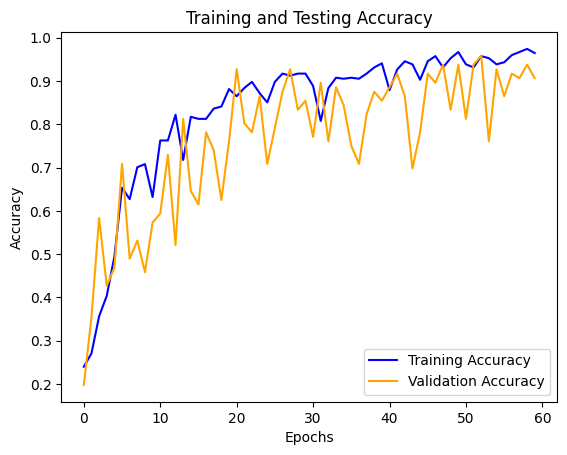

In [103]:
plt.plot(his.history['accuracy'],color='b',label='Training Accuracy')
plt.plot(his.history['val_accuracy'],color='orange',label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy')
plt.legend()
plt.show()

In [104]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequent  (None, None, None, None   0         
 ial)                        )                                   
                                                                 
 vgg19 (Functional)          (None, None, None, 512)   20024384  
                                                                 
 global_max_pooling2d_1 (Gl  (None, 512)               0         
 obalMaxPooling2D)                                               
                                                                 
 output_layer (Dense)        (None, 5)                 2565      
                                                                 
Total params: 20026949 (76.40 MB)
Trainable params: 2002694

In [105]:
from keras.utils import plot_model

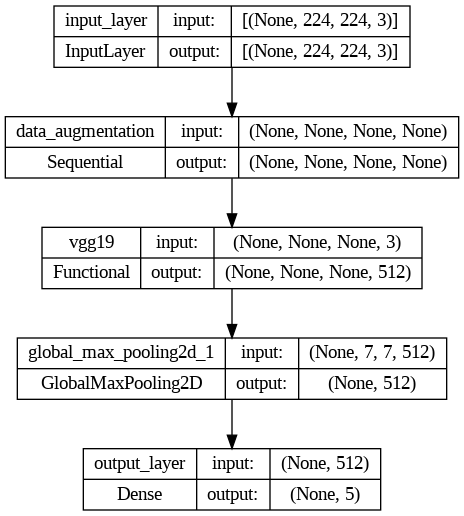

In [106]:
plot_model(model,to_file='model_plot.png',show_shapes=True,show_layer_names=True)

In [ ]:
plot_model(
    model,
    to_file='model_plot_3d.png',
    expand_nested=True,
    show_shapes=True,
    show_layer_names=True
)

##Inception Model

In [109]:
# Load the pre-trained InceptionV3 model
base_model = tf.keras.applications.InceptionV3(
    include_top=False,
    weights='imagenet'
)

87910968/87910968 [==============================] - 0s 0us/step


In [110]:
base_model.trainable = True

In [111]:
#Neural network
# from tensorflow.keras.applications import ResNet50
from keras.layers import Input
# from keras.layers.pooling import AveragePooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.models import Model

In [112]:
datAug = tf.keras.Sequential([
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomFlip('horizontal')
], name="data_augmentation")

In [113]:
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")
x = datAug(inputs)
x = base_model(x, training=True)
x = layers.GlobalMaxPooling2D()(x)
outputs = tf.keras.layers.Dense(len(classes), activation="softmax", name="output_layer")(x)
model = tf.keras.models.Model(inputs, outputs)

In [114]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=["accuracy"])

In [115]:
# Train the model
hist= model.fit(
    traug.flow(x_train,y_train,batch_size=BATCH_SIZE),
    epochs=60,
    batch_size= BATCH_SIZE,
    steps_per_epoch=len(x_train)//BATCH_SIZE,
    validation_data= valaug.flow(x_test,y_test,batch_size=BATCH_SIZE),
    validation_steps=len(x_test)//BATCH_SIZE
)

Epoch 1/60
27/27 [==============================] - 49s 425ms/step - loss: 1.6361 - accuracy: 0.5226 - val_loss: 1.2105 - val_accuracy: 0.6250
Epoch 2/60
27/27 [==============================] - 7s 234ms/step - loss: 0.8761 - accuracy: 0.6983 - val_loss: 1.0071 - val_accuracy: 0.6979
Epoch 3/60
27/27 [==============================] - 7s 276ms/step - loss: 0.6322 - accuracy: 0.7886 - val_loss: 0.6647 - val_accuracy: 0.6875
Epoch 4/60
27/27 [==============================] - 8s 285ms/step - loss: 0.6095 - accuracy: 0.7743 - val_loss: 0.6890 - val_accuracy: 0.7708
Epoch 5/60
27/27 [==============================] - 8s 297ms/step - loss: 0.4969 - accuracy: 0.8242 - val_loss: 0.6337 - val_accuracy: 0.7604
Epoch 6/60
27/27 [==============================] - 6s 227ms/step - loss: 0.4260 - accuracy: 0.8527 - val_loss: 0.6980 - val_accuracy: 0.7396
Epoch 7/60
27/27 [==============================] - 9s 324ms/step - loss: 0.4283 - accuracy: 0.8409 - val_loss: 0.6911 - val_accuracy: 0.7604
Epoch

In [116]:
import joblib
joblib.dump(model,'/content/GoogleDrive/MyDrive/dataset/models/iv3model.pkl')

['/content/GoogleDrive/MyDrive/dataset/models/iv3model.pkl']

In [117]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequent  (None, None, None, None   0         
 ial)                        )                                   
                                                                 
 inception_v3 (Functional)   (None, None, None, 2048   21802784  
                             )                                   
                                                                 
 global_max_pooling2d_2 (Gl  (None, 2048)              0         
 obalMaxPooling2D)                                               
                                                                 
 output_layer (Dense)        (None, 5)                 10245     
                                                           

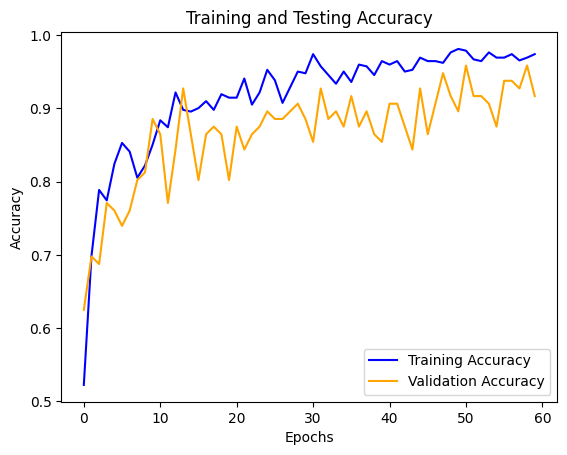

In [118]:
plt.plot(hist.history['accuracy'],color='b',label='Training Accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy')
plt.legend()
plt.show()

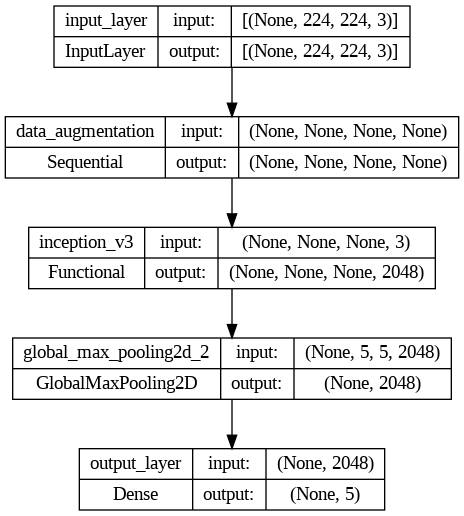

In [119]:
plot_model(model,to_file='model_plot_iv3.png',show_shapes=True,show_layer_names=True)

##Prediction

In [120]:
import joblib

In [122]:
model1= joblib.load('/content/GoogleDrive/MyDrive/dataset/models/vggmodel.pkl')
model2= joblib.load('/content/GoogleDrive/MyDrive/dataset/models/iv3model.pkl')

In [124]:
np.save('/content/GoogleDrive/MyDrive/dataset/train_test_arrays/x_train.npy',x_train)

In [125]:
np.save('/content/GoogleDrive/MyDrive/dataset/train_test_arrays/x_test.npy',x_test)

In [126]:
np.save('/content/GoogleDrive/MyDrive/dataset/train_test_arrays/y_train.npy',y_train)

In [127]:
np.save('/content/GoogleDrive/MyDrive/dataset/train_test_arrays/y_test.npy',x_test)

In [128]:
preds1 = model1.predict(x_test)
preds2 = model2.predict(x_test)

4/4 [==============================] - 4s 378ms/step


In [130]:
ensemble_preds = (preds1 + preds2) / 2

In [131]:
ensemble_accuracy = np.mean(ensemble_preds == y_test)

In [132]:
ensemble_accuracy

0.005454545454545455

##Test

In [133]:
import cv2

In [163]:
image= cv2.imread('/content/GoogleDrive/MyDrive/dataset/dataset/P.aeruginosa/13259.jpg')
image= cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
image= cv2.resize(image,IMG_SIZE)
image= np.expand_dims(image,axis=0)

In [164]:
pred= model1.predict(image)

1/1 [==============================] - 0s 19ms/step


In [165]:
pred

array([[1.1006220e-02, 1.8927777e-04, 1.0731014e-03, 9.8441875e-01,
        3.3127521e-03]], dtype=float32)

In [166]:
ind=np.argmax(pred)

In [167]:
pred2= model2.predict(image)

1/1 [==============================] - 0s 45ms/step


In [168]:
pred2

array([[0.12789895, 0.22642754, 0.14837658, 0.27141508, 0.22588189]],
      dtype=float32)

In [169]:
ind2=np.argmax(pred2)

In [172]:
ind2

3

In [171]:
classes[ind2]

'C.albicans'

In [173]:
from sklearn.metrics import accuracy_score

In [180]:
model2.evaluate(x_test,y_test)

4/4 [==============================] - 3s 77ms/step - loss: 0.2253 - accuracy: 0.9273


[0.22531209886074066, 0.9272727370262146]

In [ ]:
preds1